# Machine Learning Model And Data Science Thinking From Scratch With Kaggel Dataset of Titanic

In this NoteBook we are going to understand what a data science project on a very high level looks like we will examine the dataset like scientist we will convert our intuative approach into our model and predict the survival of the titanic ships pasengers

In [ ]:
train <- read.csv("./Downloads/train.csv", header = TRUE)
test <- read.csv("./Downloads/test.csv", header = TRUE)

In [7]:
test.Survived <- data.frame(Survived = rep("None", nrow(test)), test[,])

In [9]:
data.combined <- rbind(train, test.Survived)

In [10]:
# A bit about R data types (e.g., factors)
str(data.combined)

'data.frame':	1309 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : chr  "0" "1" "1" "1" ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 929 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 187 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [11]:
data.combined$Survived <- as.factor(data.combined$Survived)
data.combined$Pclass <- as.factor(data.combined$Pclass)

In [12]:
# Take a look at gross survival rates
table(data.combined$Survived)


   0    1 None 
 549  342  418 

In [13]:
# Distribution across classes
table(data.combined$Pclass)


  1   2   3 
323 277 709 

In [14]:
# Load up ggplot2 package to use for visualizations
library(ggplot2)

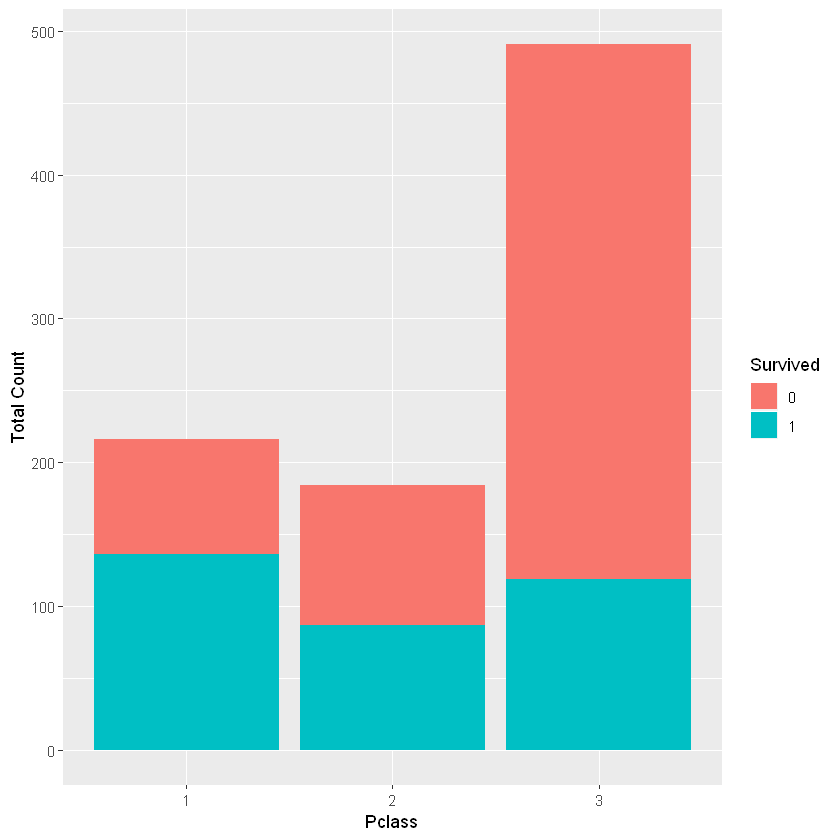

In [16]:

# Hypothesis - Rich folks survived at a higer rate
train$Pclass <- as.factor(train$Pclass)
ggplot(train, aes(x = Pclass, fill = factor(Survived))) +
  geom_bar() +
  xlab("Pclass") +
  ylab("Total Count") +
  labs(fill = "Survived") 

In [17]:
# Examine the first few names in the training data set
head(as.character(train$Name))

[1] "Braund, Mr. Owen Harris"                            
[2] "Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
[3] "Heikkinen, Miss. Laina"                             
[4] "Futrelle, Mrs. Jacques Heath (Lily May Peel)"       
[5] "Allen, Mr. William Henry"                           
[6] "Moran, Mr. James"

In [18]:
# How many unique names are there across both train & test?
length(unique(as.character(data.combined$Name)))

[1] 1307

In [19]:
# Two duplicate names, take a closer look
# First, get the duplicate names and store them as a vector
dup.names <- as.character(data.combined[which(duplicated(as.character(data.combined$Name))), "Name"])

In [20]:
# Next, take a look at the records in the combined data set
data.combined[which(data.combined$Name %in% dup.names),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
290,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,,Q
697,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,,S
892,892,None,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
898,898,None,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q


In [21]:
# What is up with the 'Miss.' and 'Mr.' thing?
library(stringr)


In [24]:
# Any correlation with other variables (e.g., sibsp)?
misses <- data.combined[which(str_detect(data.combined$Name, "Miss.")),]
misses[1:5,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
11,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
12,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
15,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S
23,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15,0,0,330923,8.0292,,Q


In [25]:
# Hypothesis - Name titles correlate with age
mrses <- data.combined[which(str_detect(data.combined$Name, "Mrs.")), ]
mrses[1:5,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
16,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.0000,,S


In [26]:
# Check out males to see if pattern continues
males <- data.combined[which(data.combined$Sex == "male"), ]
males[1:5,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S


In [27]:
extractTitle <- function(name) {
  name <- as.character(name)
  
  if (length(grep("Miss.", name)) > 0) {
    return ("Miss.")
  } else if (length(grep("Master.", name)) > 0) {
    return ("Master.")
  } else if (length(grep("Mrs.", name)) > 0) {
    return ("Mrs.")
  } else if (length(grep("Mr.", name)) > 0) {
    return ("Mr.")
  } else {
    return ("Other")
  }
}

In [28]:
# NOTE - The code below uses a for loop which is not a very R way of
#        doing things
titles <- NULL
for (i in 1:nrow(data.combined)) {
  titles <- c(titles, extractTitle(data.combined[i,"Name"]))
}
data.combined$title <- as.factor(titles)

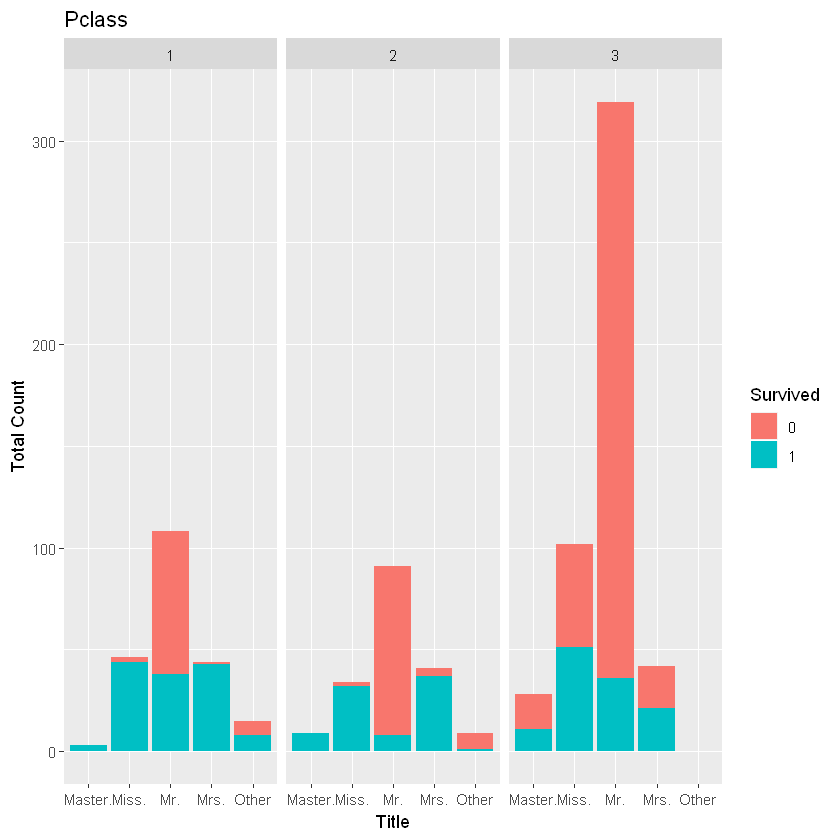

In [30]:
# Since we only have survived lables for the train set, only use the
# first 891 rows
ggplot(data.combined[1:891,], aes(x = title, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass) + 
  ggtitle("Pclass") +
  xlab("Title") +
  ylab("Total Count") +
  labs(fill = "Survived")

In [31]:
# OK, age and sex seem pretty important as derived from analysis of title, let's take a closer 
# look at the distibutions of age over entire data set
summary(data.combined$Age)
summary(data.combined[1:891,"Age"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.17   21.00   28.00   29.88   39.00   80.00     263 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   20.12   28.00   29.70   38.00   80.00     177 

Warning message:
"`geom_bar()` no longer has a `binwidth` parameter. Please use `geom_histogram()` instead."Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

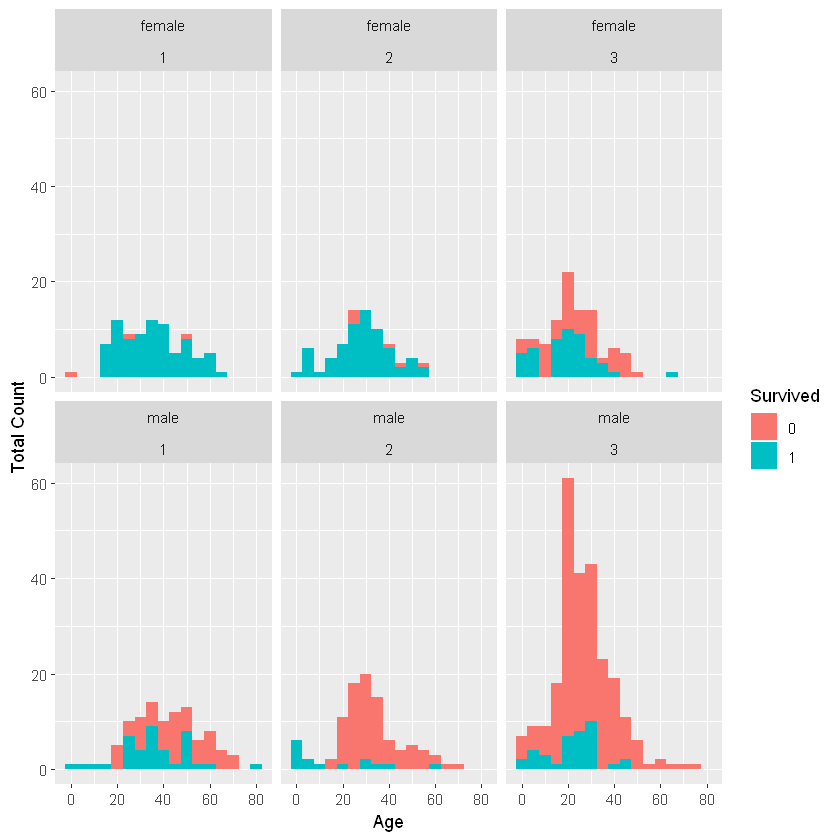

In [36]:
# Just to be thorough, take a look at survival rates broken out by sex, pclass, and age
ggplot(data.combined[1:891,], aes(x = Age, fill = Survived)) +
  facet_wrap(~Sex + Pclass) +
  geom_bar(binwidth = 5) +
  xlab("Age") +
  ylab("Total Count")

In [37]:
# Validate that "Master." is a good proxy for male children
boys <- data.combined[which(data.combined$title == "Master."),]
summary(boys$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.330   2.000   4.000   5.483   9.000  14.500       8 

In [38]:
# We know that "Miss." is more complicated, let's examine further
misses <- data.combined[which(data.combined$title == "Miss."),]
summary(misses$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.17   15.00   22.00   21.77   30.00   63.00      50 

Warning message:
"Removed 36 rows containing non-finite values (stat_bin)."

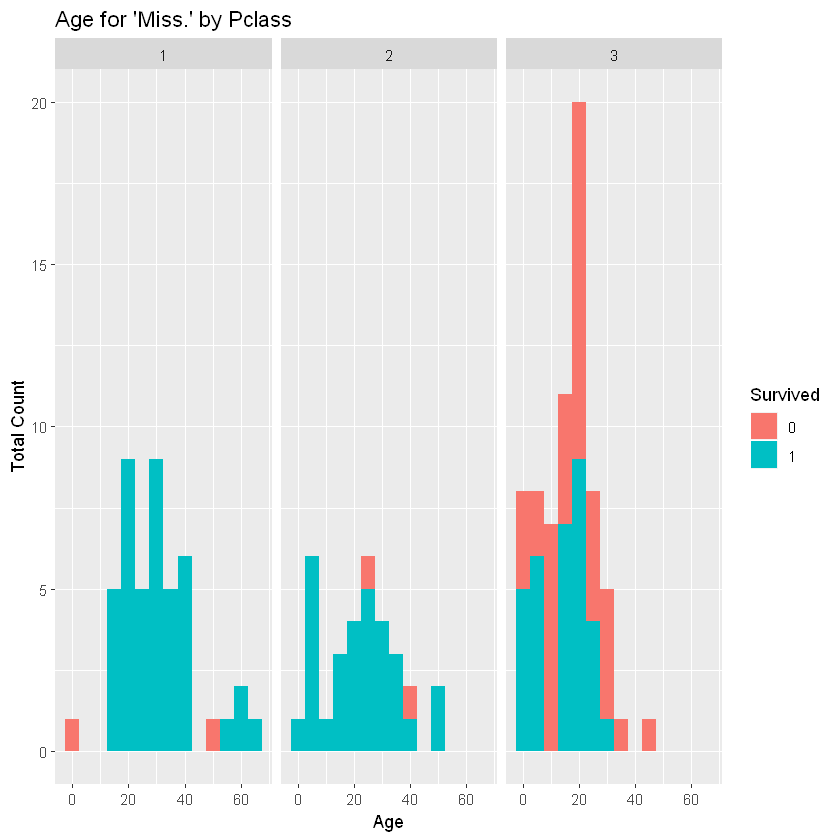

In [41]:
ggplot(misses[misses$Survived != "None",], aes(x = Age, fill = Survived)) +
  facet_wrap(~Pclass) +
  geom_histogram(binwidth = 5) +
  ggtitle("Age for 'Miss.' by Pclass") + 
  xlab("Age") +
  ylab("Total Count")

In [ ]:
misses.alone <- misses[which(misses$sibsp == 0 & misses$parch == 0),]
summary(misses.alone$age)
length(which(misses.alone$age <= 14.5))


In [44]:
# Move on to the sibsp variable, summarize the variable
summary(data.combined$SibSp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4989  1.0000  8.0000 

In [45]:
# Can we treat as a factor?
length(unique(data.combined$SibSp))

[1] 7

In [46]:
data.combined$SibSp <- as.factor(data.combined$SibSp)

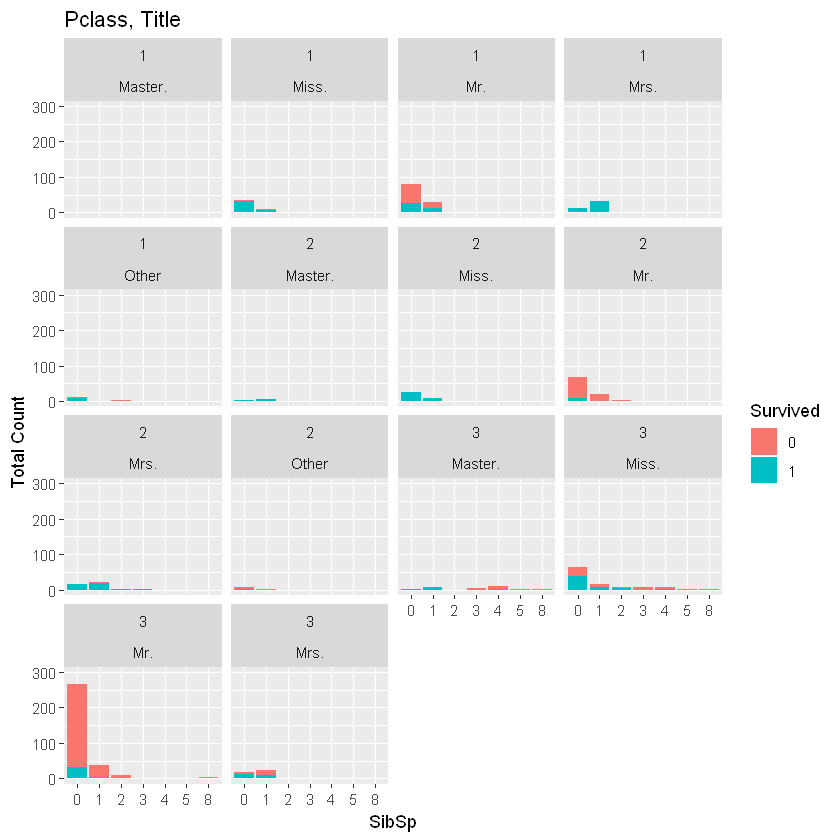

In [47]:
# We believe title is predictive. Visualize survival reates by sibsp, pclass, and title
ggplot(data.combined[1:891,], aes(x = SibSp, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass + title) + 
  ggtitle("Pclass, Title") +
  xlab("SibSp") +
  ylab("Total Count") +
  ylim(0,300) +
  labs(fill = "Survived")

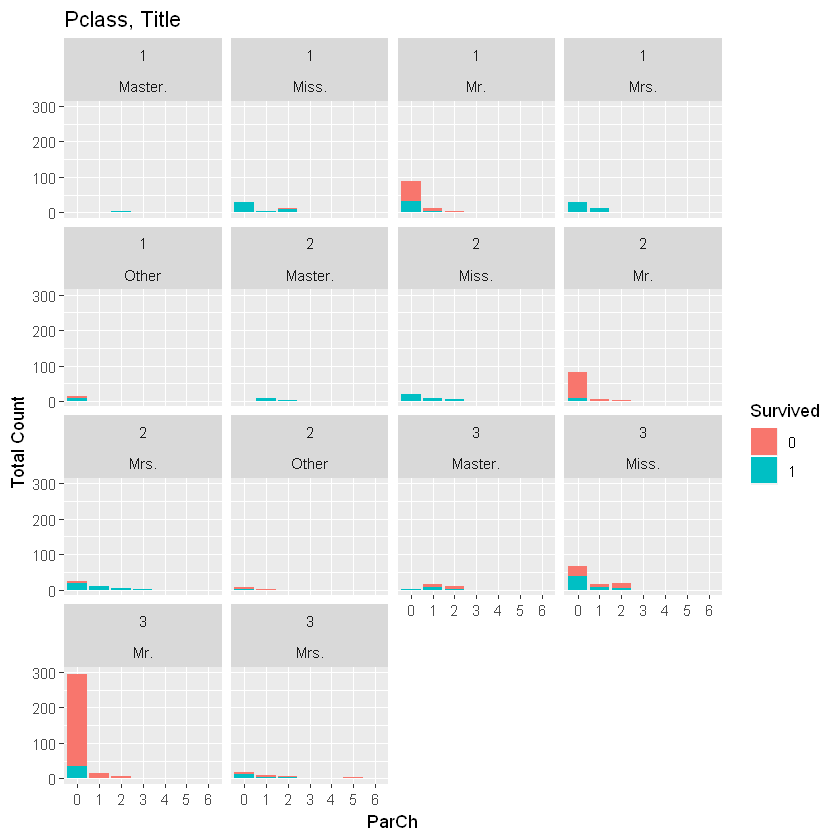

In [49]:
# Treat the parch vaiable as a factor and visualize
data.combined$Parch <- as.factor(data.combined$Parch)
ggplot(data.combined[1:891,], aes(x = Parch, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass + title) + 
  ggtitle("Pclass, Title") +
  xlab("ParCh") +
  ylab("Total Count") +
  ylim(0,300) +
  labs(fill = "Survived")

In [50]:
# Let's try some feature engineering. What about creating a family size feature?
temp.sibsp <- c(train$SibSp, test$SibSp)
temp.parch <- c(train$Parch, test$Parch)
data.combined$family.size <- as.factor(temp.sibsp + temp.parch + 1)

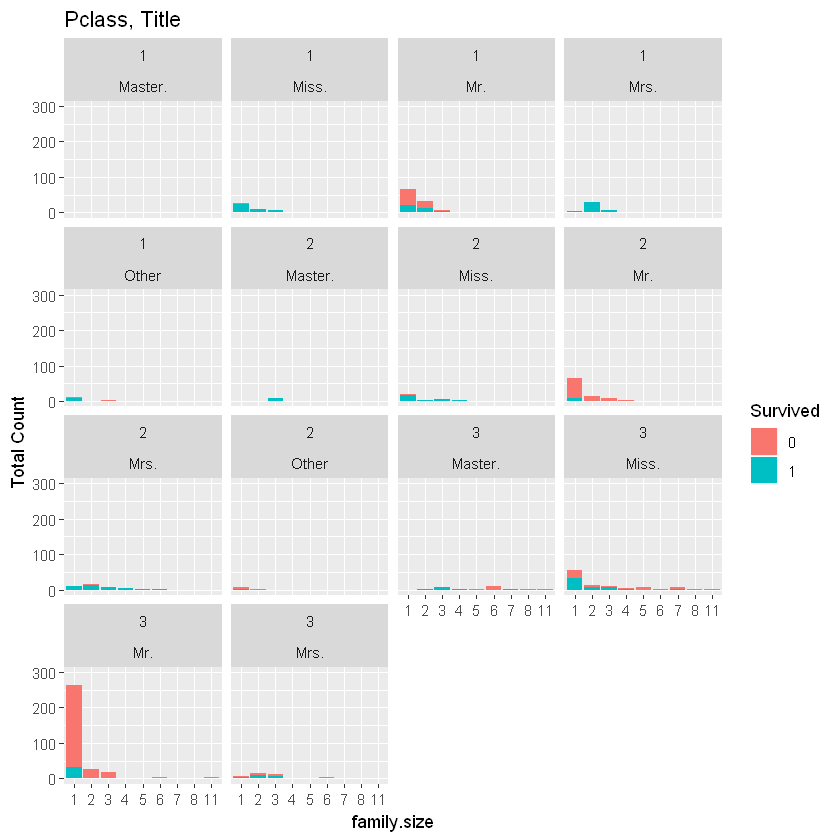

In [51]:
# Visualize it to see if it is predictive
ggplot(data.combined[1:891,], aes(x = family.size, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass + title) + 
  ggtitle("Pclass, Title") +
  xlab("family.size") +
  ylab("Total Count") +
  ylim(0,300) +
  labs(fill = "Survived")

In [52]:
# Take a look at the ticket variable
str(data.combined$Ticket)

 Factor w/ 929 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...


In [53]:
# Convert it and display first 20
data.combined$Ticket <- as.character(data.combined$Ticket)
data.combined$Ticket[1:20]


[1] "A/5 21171"        "PC 17599"         "STON/O2. 3101282" "113803"          
 [5] "373450"           "330877"           "17463"            "349909"          
 [9] "347742"           "237736"           "PP 9549"          "113783"          
[13] "A/5. 2151"        "347082"           "350406"           "248706"          
[17] "382652"           "244373"           "345763"           "2649"

In [54]:
# We'll start with taking a look at just the first char for each
ticket.first.char <- ifelse(data.combined$Ticket == "", " ", substr(data.combined$Ticket, 1, 1))
unique(ticket.first.char)

[1] "A" "P" "S" "1" "3" "2" "C" "7" "W" "4" "F" "L" "9" "6" "5" "8"

In [55]:
# OK, we can make a factor for analysis purposes and visualize
data.combined$ticket.first.char <- as.factor(ticket.first.char)

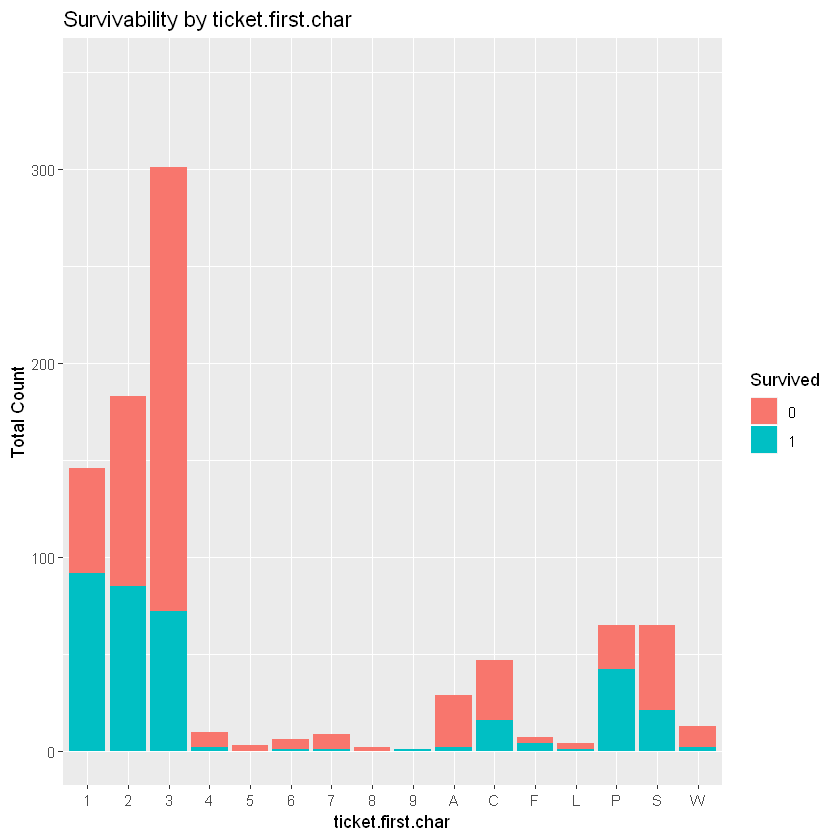

In [56]:
# First, a high-level plot of the data
ggplot(data.combined[1:891,], aes(x = ticket.first.char, fill = Survived)) +
  geom_bar() +
  ggtitle("Survivability by ticket.first.char") +
  xlab("ticket.first.char") +
  ylab("Total Count") +
  ylim(0,350) +
  labs(fill = "Survived")

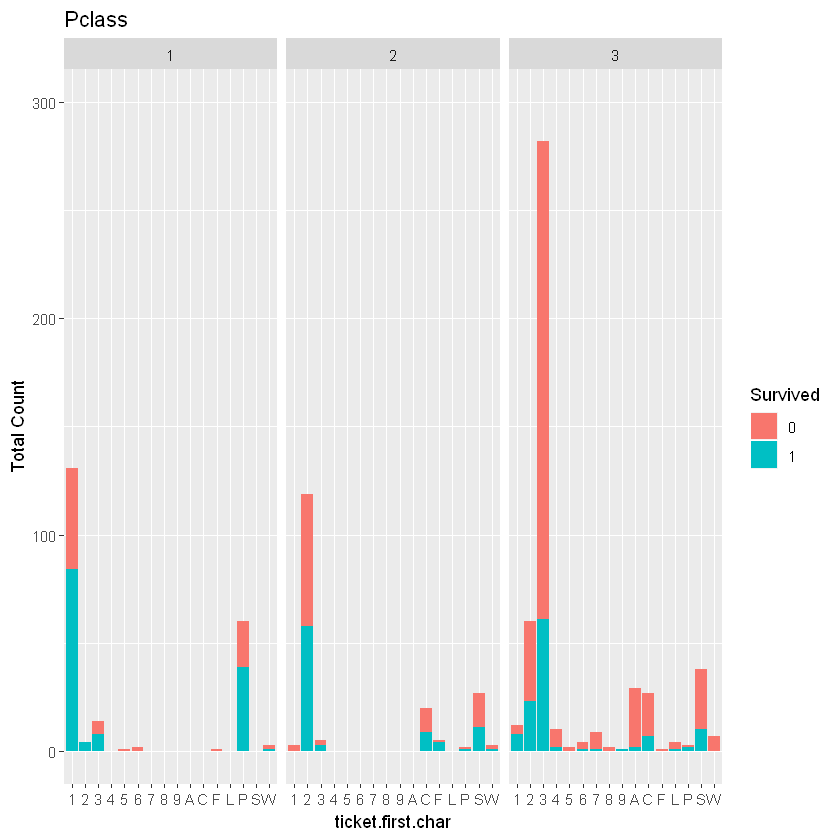

In [57]:
# Ticket seems like it might be predictive, drill down a bit
ggplot(data.combined[1:891,], aes(x = ticket.first.char, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass) + 
  ggtitle("Pclass") +
  xlab("ticket.first.char") +
  ylab("Total Count") +
  ylim(0,300) +
  labs(fill = "Survived")

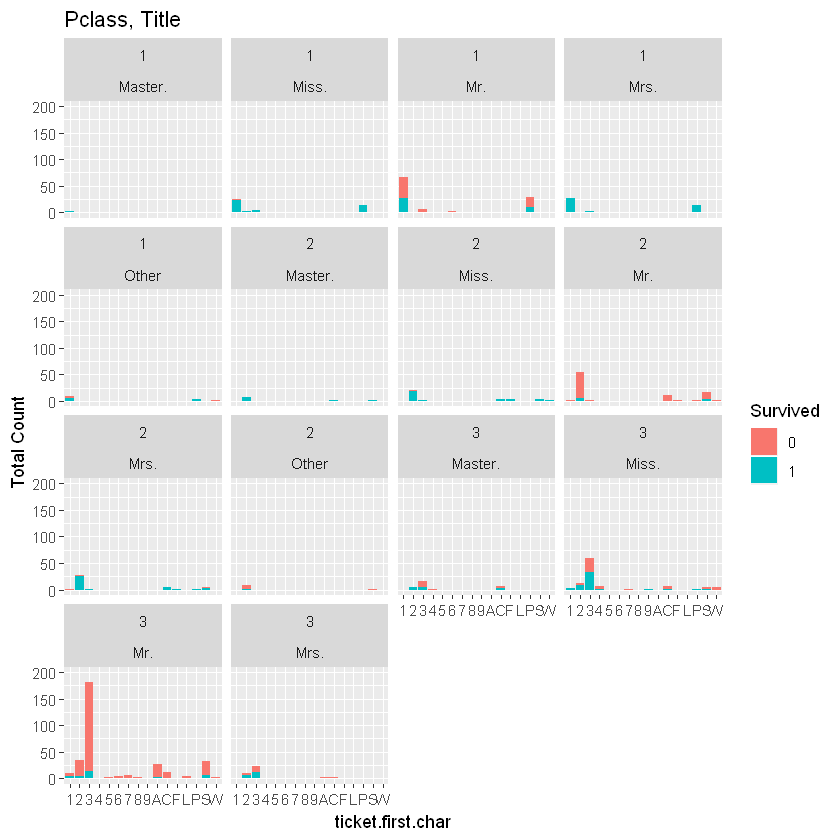

In [58]:
# Lastly, see if we get a pattern when using combination of pclass & title
ggplot(data.combined[1:891,], aes(x = ticket.first.char, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass + title) + 
  ggtitle("Pclass, Title") +
  xlab("ticket.first.char") +
  ylab("Total Count") +
  ylim(0,200) +
  labs(fill = "Survived")

In [59]:
# Next up - the fares Titanic passengers paid
summary(data.combined$Fare)
length(unique(data.combined$Fare))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   7.896  14.454  33.295  31.275 512.329       1 

[1] 282

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing missing values (geom_bar)."

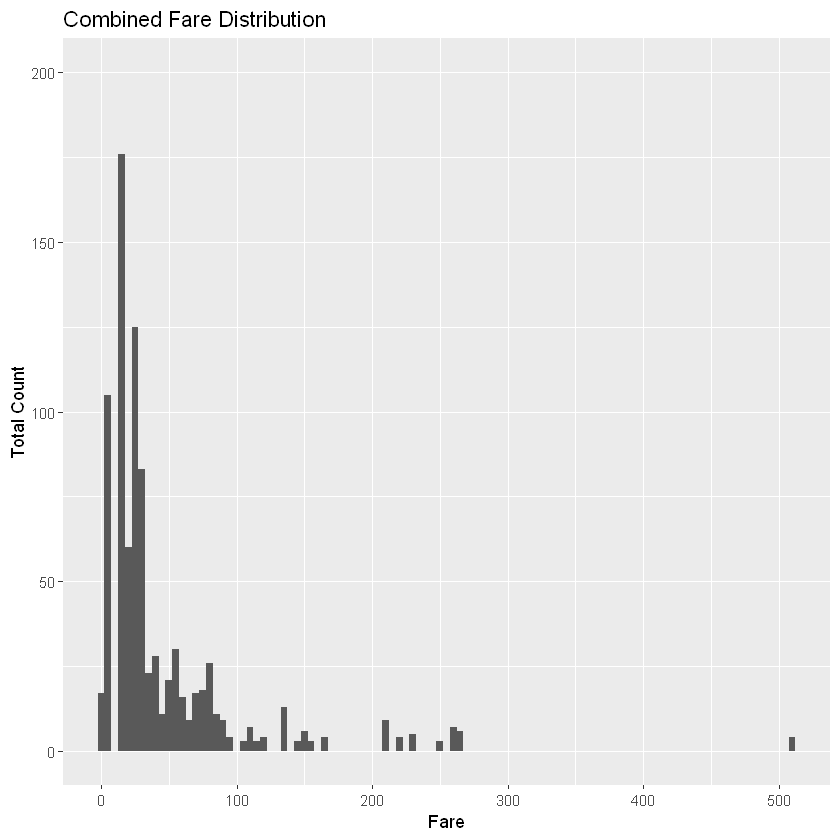

In [60]:
# Can't make fare a factor, treat as numeric & visualize with histogram
ggplot(data.combined, aes(x = Fare)) +
  geom_histogram(binwidth = 5) +
  ggtitle("Combined Fare Distribution") +
  xlab("Fare") +
  ylab("Total Count") +
  ylim(0,200)

Warning message:
"Removed 3 rows containing missing values (geom_bar)."

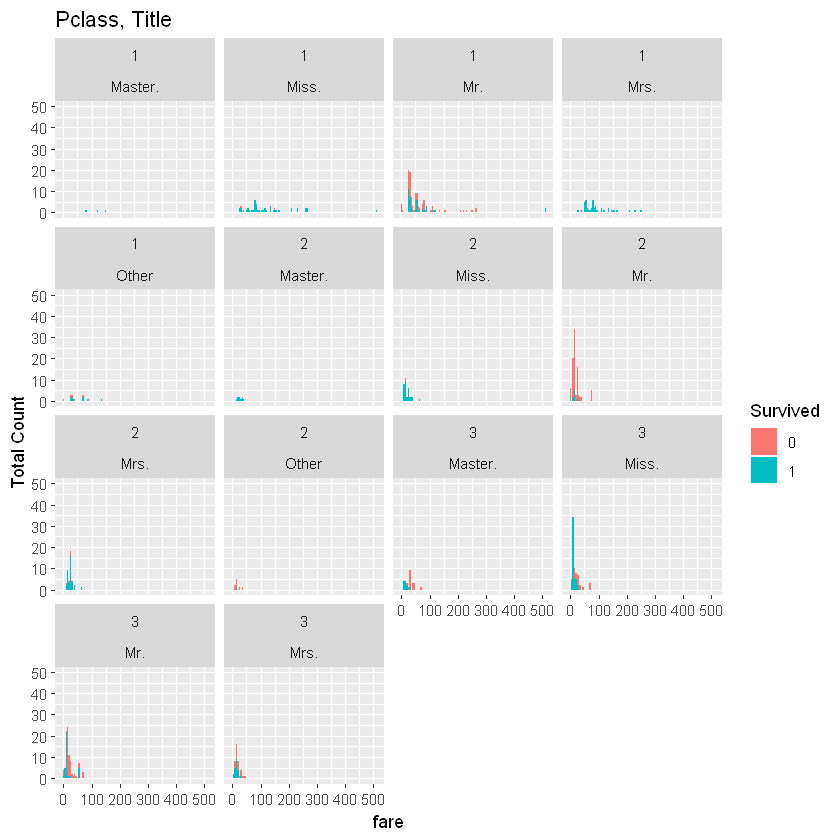

In [61]:
# Let's check to see if fare has predictive power
ggplot(data.combined[1:891,], aes(x = Fare, fill = Survived)) +
  geom_histogram(binwidth = 5) +
  facet_wrap(~Pclass + title) + 
  ggtitle("Pclass, Title") +
  xlab("fare") +
  ylab("Total Count") +
  ylim(0,50) + 
  labs(fill = "Survived")

In [62]:
# Analysis of the cabin variable
str(data.combined$Cabin)


 Factor w/ 187 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...


In [63]:
# Cabin really isn't a factor, make a string and the display first 100
data.combined$Cabin <- as.character(data.combined$Cabin)
data.combined$Cabin[1:100]


[1] ""            "C85"         ""            "C123"        ""           
  [6] ""            "E46"         ""            ""            ""           
 [11] "G6"          "C103"        ""            ""            ""           
 [16] ""            ""            ""            ""            ""           
 [21] ""            "D56"         ""            "A6"          ""           
 [26] ""            ""            "C23 C25 C27" ""            ""           
 [31] ""            "B78"         ""            ""            ""           
 [36] ""            ""            ""            ""            ""           
 [41] ""            ""            ""            ""            ""           
 [46] ""            ""            ""            ""            ""           
 [51] ""            ""            "D33"         ""            "B30"        
 [56] "C52"         ""            ""            ""            ""           
 [61] ""            "B28"         "C83"         ""            ""           
 [66] ""            "F33"         ""            ""            ""           
 [71] ""            ""            ""            ""            ""           
 [76] "F G73"       ""            ""            ""            ""           
 [81] ""            ""            ""            ""            ""           
 [86] ""            ""            ""            "C23 C25 C27" ""           
 [91] ""            ""            "E31"         ""            ""           
 [96] ""            "A5"          "D10 D12"     ""            ""

In [64]:
# Replace empty cabins with a "U"
data.combined[which(data.combined$Cabin == ""), "cabin"] <- "U"
data.combined$Cabin[1:100]

[1] ""            "C85"         ""            "C123"        ""           
  [6] ""            "E46"         ""            ""            ""           
 [11] "G6"          "C103"        ""            ""            ""           
 [16] ""            ""            ""            ""            ""           
 [21] ""            "D56"         ""            "A6"          ""           
 [26] ""            ""            "C23 C25 C27" ""            ""           
 [31] ""            "B78"         ""            ""            ""           
 [36] ""            ""            ""            ""            ""           
 [41] ""            ""            ""            ""            ""           
 [46] ""            ""            ""            ""            ""           
 [51] ""            ""            "D33"         ""            "B30"        
 [56] "C52"         ""            ""            ""            ""           
 [61] ""            "B28"         "C83"         ""            ""           
 [66] ""            "F33"         ""            ""            ""           
 [71] ""            ""            ""            ""            ""           
 [76] "F G73"       ""            ""            ""            ""           
 [81] ""            ""            ""            ""            ""           
 [86] ""            ""            ""            "C23 C25 C27" ""           
 [91] ""            ""            "E31"         ""            ""           
 [96] ""            "A5"          "D10 D12"     ""            ""

In [65]:
# Take a look at just the first char as a factor
cabin.first.char <- as.factor(substr(data.combined$Cabin, 1, 1))
str(cabin.first.char)
levels(cabin.first.char)

 Factor w/ 9 levels "","A","B","C",..: 1 4 1 4 1 1 6 1 1 1 ...


[1] ""  "A" "B" "C" "D" "E" "F" "G" "T"

In [66]:
# Add to combined data set and plot 
data.combined$cabin.first.char <- cabin.first.char

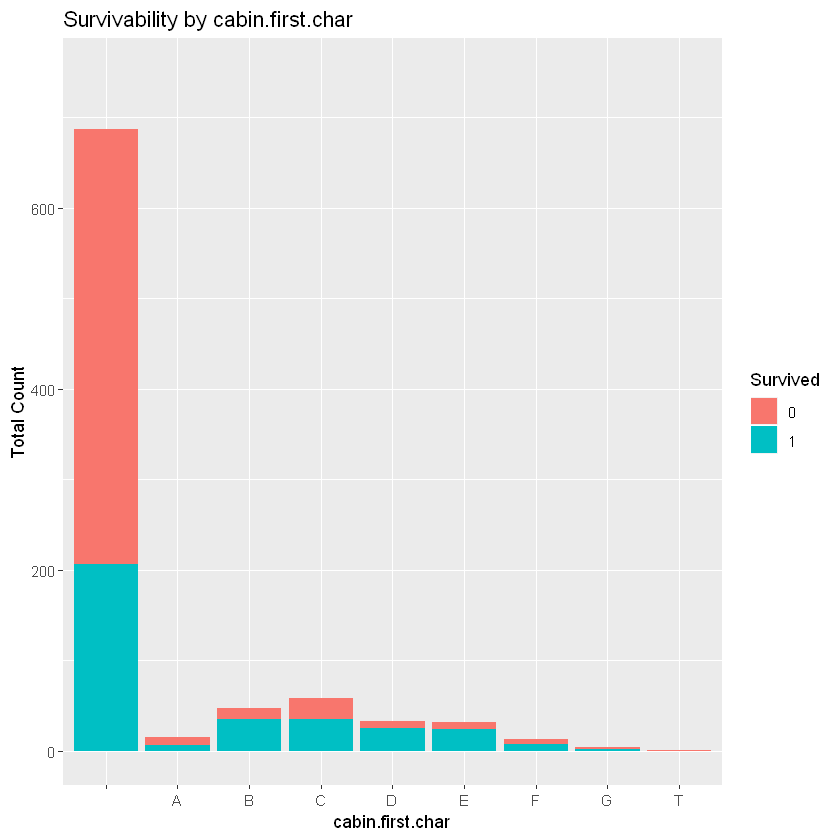

In [67]:
# High level plot
ggplot(data.combined[1:891,], aes(x = cabin.first.char, fill = Survived)) +
  geom_bar() +
  ggtitle("Survivability by cabin.first.char") +
  xlab("cabin.first.char") +
  ylab("Total Count") +
  ylim(0,750) +
  labs(fill = "Survived")

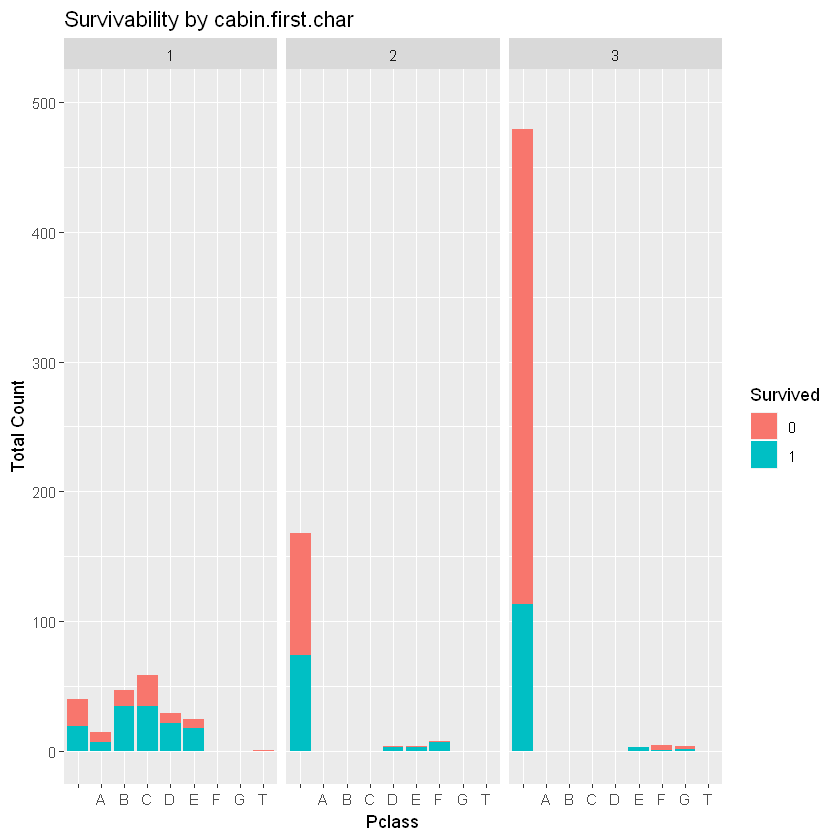

In [68]:
# Could have some predictive power, drill in
ggplot(data.combined[1:891,], aes(x = cabin.first.char, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass) +
  ggtitle("Survivability by cabin.first.char") +
  xlab("Pclass") +
  ylab("Total Count") +
  ylim(0,500) +
  labs(fill = "Survived")

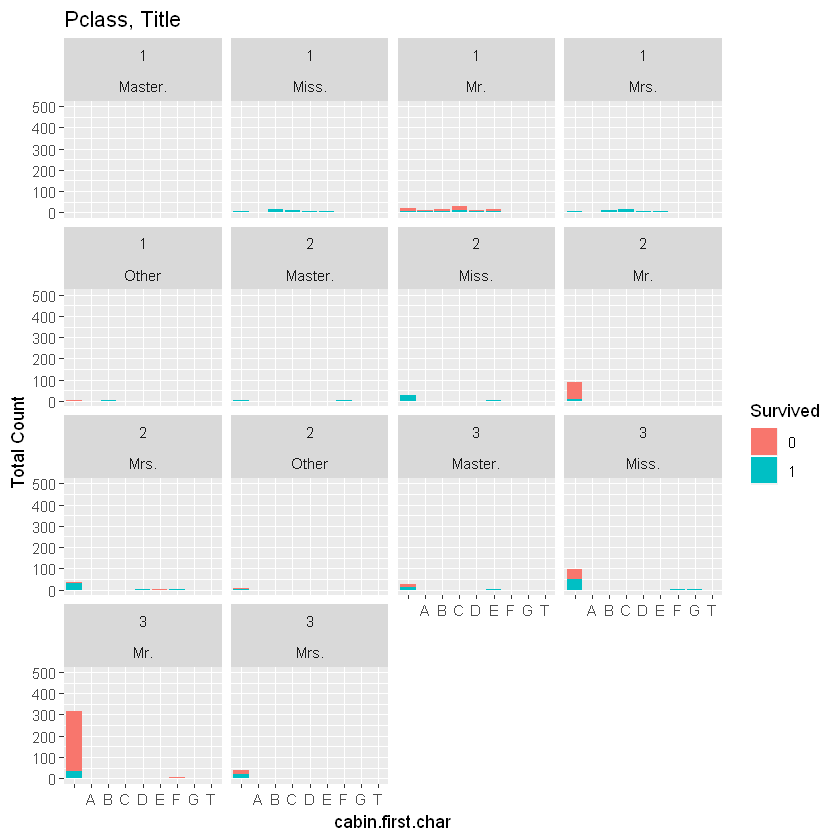

In [69]:
# Does this feature improve upon pclass + title?
ggplot(data.combined[1:891,], aes(x = cabin.first.char, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass + title) +
  ggtitle("Pclass, Title") +
  xlab("cabin.first.char") +
  ylab("Total Count") +
  ylim(0,500) +
  labs(fill = "Survived")

In [70]:
# What about folks with multiple cabins?
data.combined$cabin.multiple <- as.factor(ifelse(str_detect(data.combined$Cabin, " "), "Y", "N"))

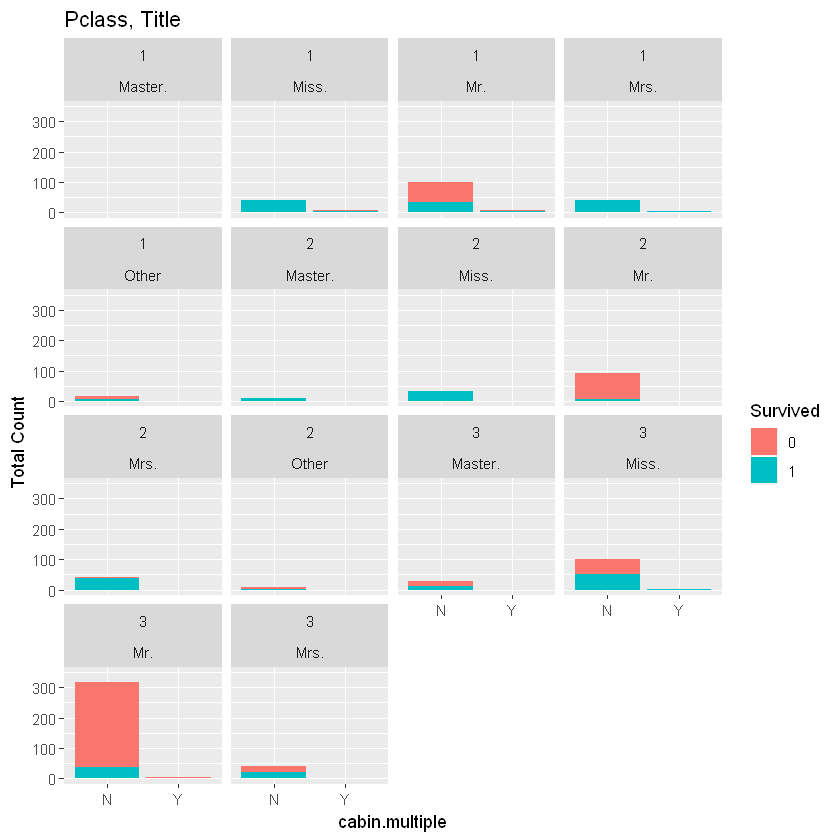

In [71]:
ggplot(data.combined[1:891,], aes(x = cabin.multiple, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass + title) +
  ggtitle("Pclass, Title") +
  xlab("cabin.multiple") +
  ylab("Total Count") +
  ylim(0,350) +
  labs(fill = "Survived")


In [72]:
# Does survivability depend on where you got onboard the Titanic?
str(data.combined$Embarked)
levels(data.combined$Embarked)

 Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


[1] ""  "C" "Q" "S"

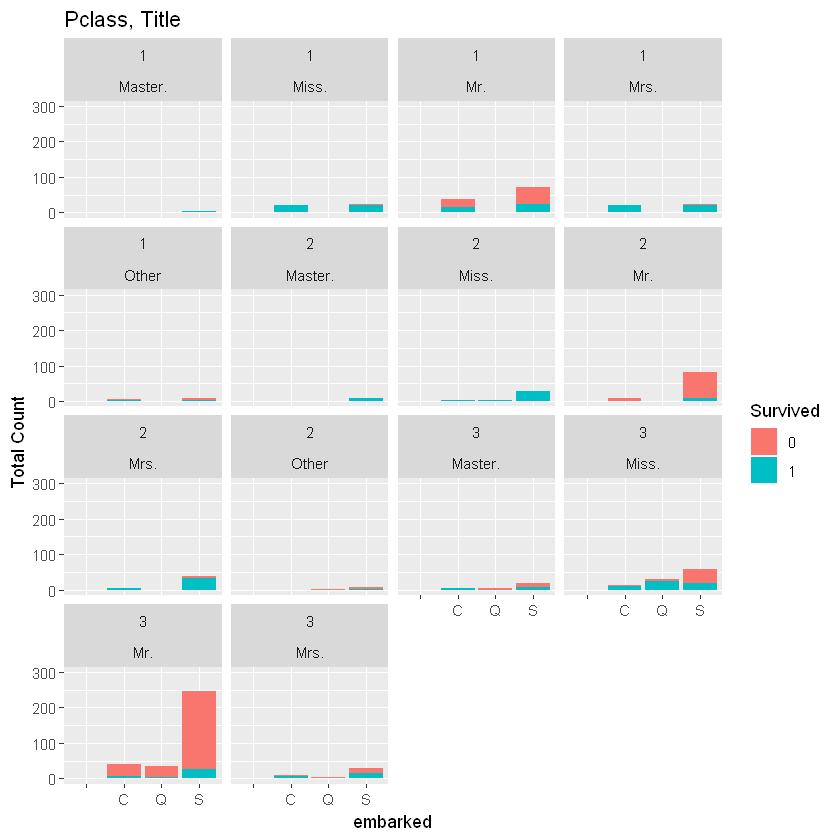

In [73]:
# Plot data for analysis
ggplot(data.combined[1:891,], aes(x = Embarked, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass + title) +
  ggtitle("Pclass, Title") +
  xlab("embarked") +
  ylab("Total Count") +
  ylim(0,300) +
  labs(fill = "Survived")

In [74]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin




Call:
 randomForest(x = rf.train.1, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 20.99%
Confusion matrix:
    0   1 class.error
0 536  13  0.02367942
1 174 168  0.50877193

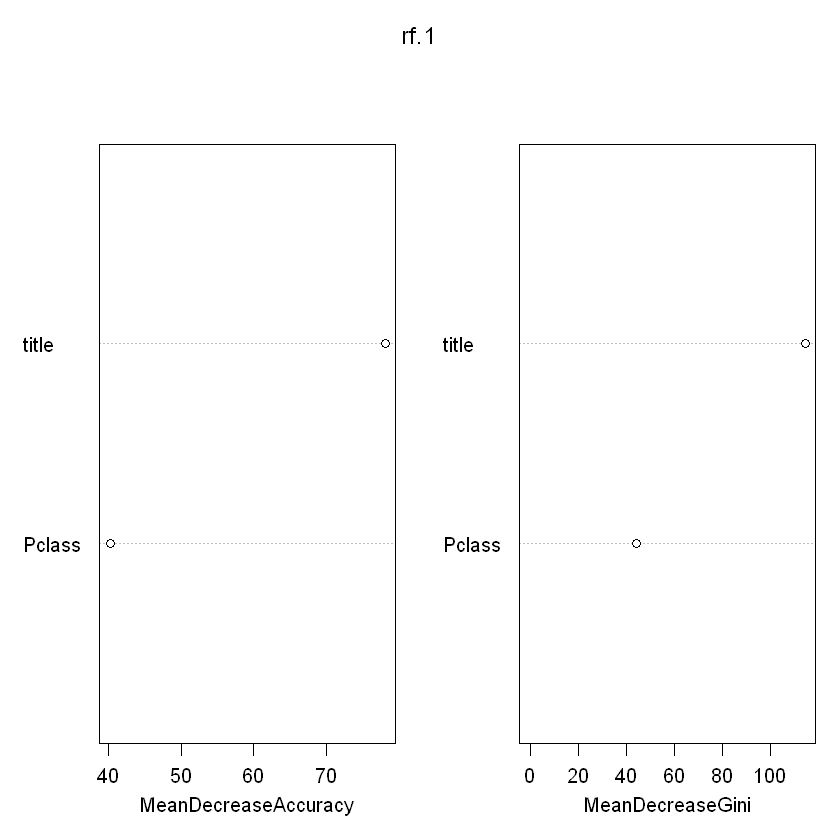

In [75]:
# Train a Random Forest with the default parameters using pclass & title
rf.train.1 <- data.combined[1:891, c("Pclass", "title")]
rf.label <- as.factor(train$Survived)

set.seed(1234)
rf.1 <- randomForest(x = rf.train.1, y = rf.label, importance = TRUE, ntree = 1000)
rf.1
varImpPlot(rf.1)


Call:
 randomForest(x = rf.train.2, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 19.53%
Confusion matrix:
    0   1 class.error
0 487  62   0.1129326
1 112 230   0.3274854

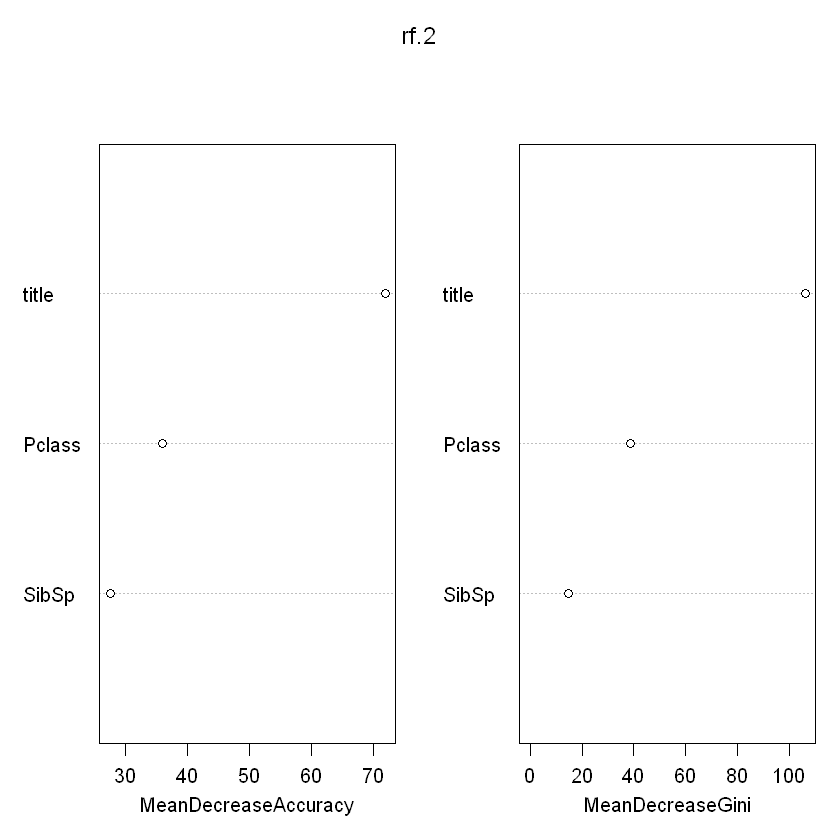

In [76]:
# Train a Random Forest using pclass, title, & sibsp
rf.train.2 <- data.combined[1:891, c("Pclass", "title", "SibSp")]

set.seed(1234)
rf.2 <- randomForest(x = rf.train.2, y = rf.label, importance = TRUE, ntree = 1000)
rf.2
varImpPlot(rf.2)


Call:
 randomForest(x = rf.train.3, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 19.87%
Confusion matrix:
    0   1 class.error
0 496  53  0.09653916
1 124 218  0.36257310

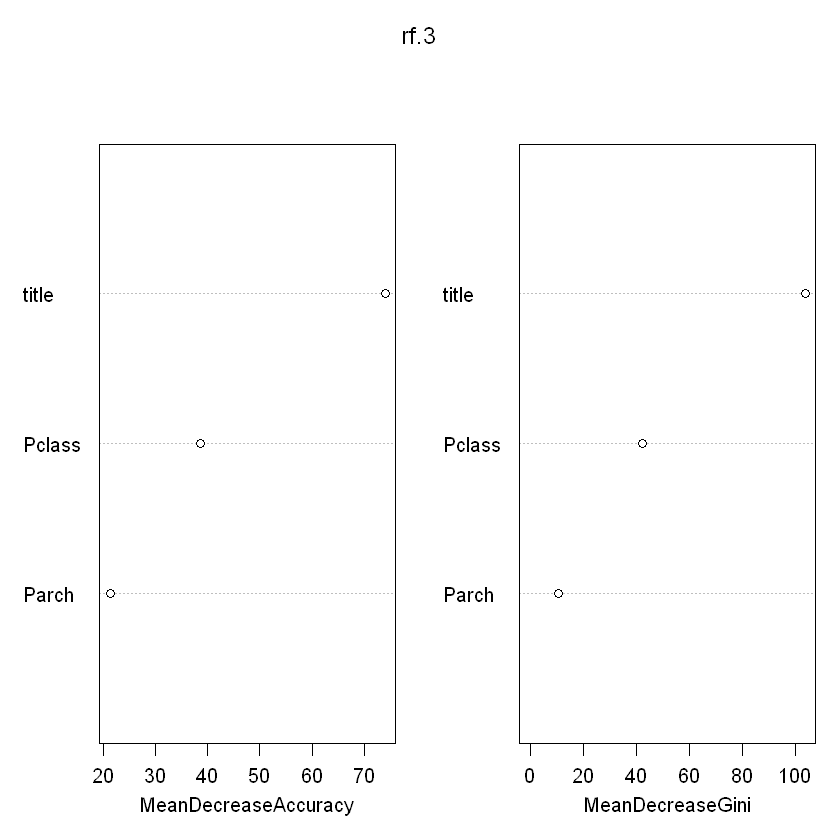

In [77]:
# Train a Random Forest using pclass, title, & parch
rf.train.3 <- data.combined[1:891, c("Pclass", "title", "Parch")]

set.seed(1234)
rf.3 <- randomForest(x = rf.train.3, y = rf.label, importance = TRUE, ntree = 1000)
rf.3
varImpPlot(rf.3)


Call:
 randomForest(x = rf.train.4, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 19.08%
Confusion matrix:
    0   1 class.error
0 490  59   0.1074681
1 111 231   0.3245614

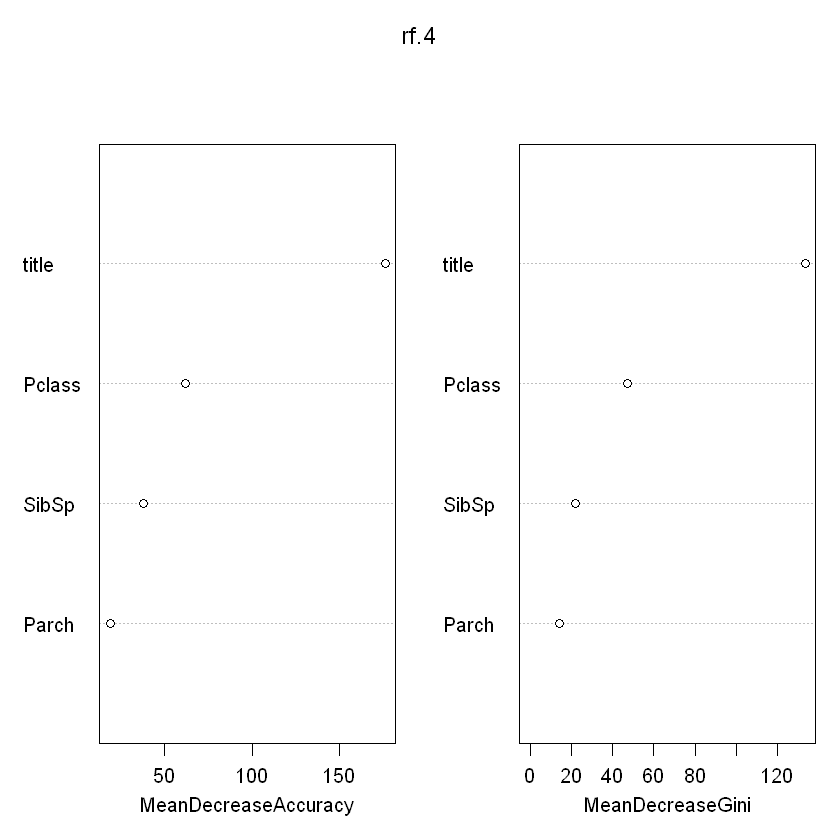

In [78]:
# Train a Random Forest using pclass, title, sibsp, parch
rf.train.4 <- data.combined[1:891, c("Pclass", "title", "SibSp", "Parch")]

set.seed(1234)
rf.4 <- randomForest(x = rf.train.4, y = rf.label, importance = TRUE, ntree = 1000)
rf.4
varImpPlot(rf.4)






Call:
 randomForest(x = rf.train.5, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 18.18%
Confusion matrix:
    0   1 class.error
0 486  63   0.1147541
1  99 243   0.2894737

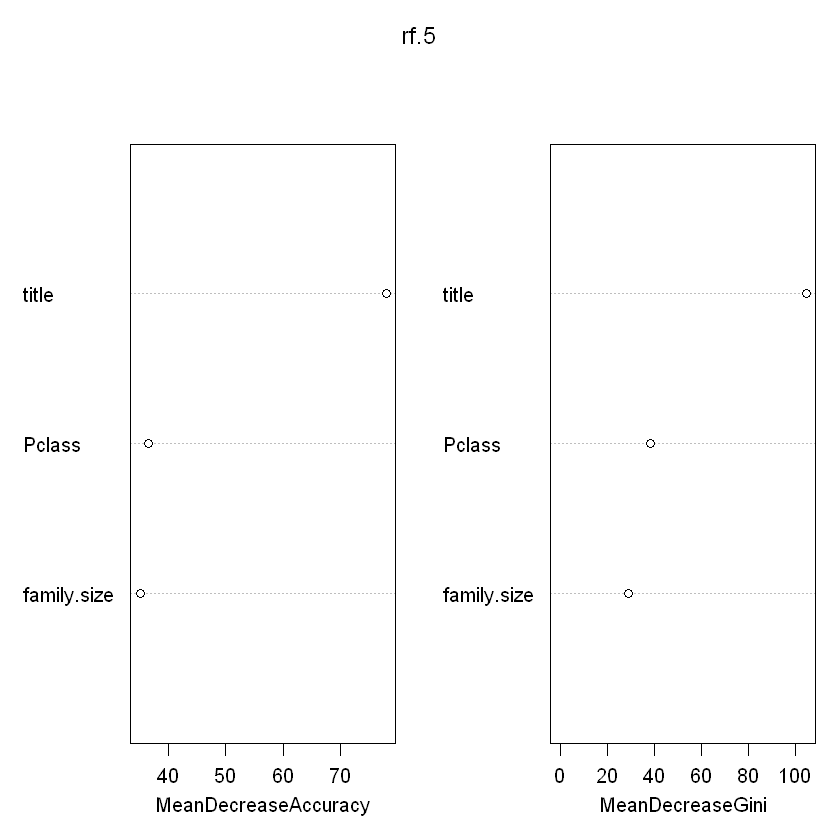

In [79]:
# Train a Random Forest using pclass, title, & family.size
rf.train.5 <- data.combined[1:891, c("Pclass", "title", "family.size")]

set.seed(1234)
rf.5 <- randomForest(x = rf.train.5, y = rf.label, importance = TRUE, ntree = 1000)
rf.5
varImpPlot(rf.5)






Call:
 randomForest(x = rf.train.6, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 19.64%
Confusion matrix:
    0   1 class.error
0 487  62   0.1129326
1 113 229   0.3304094

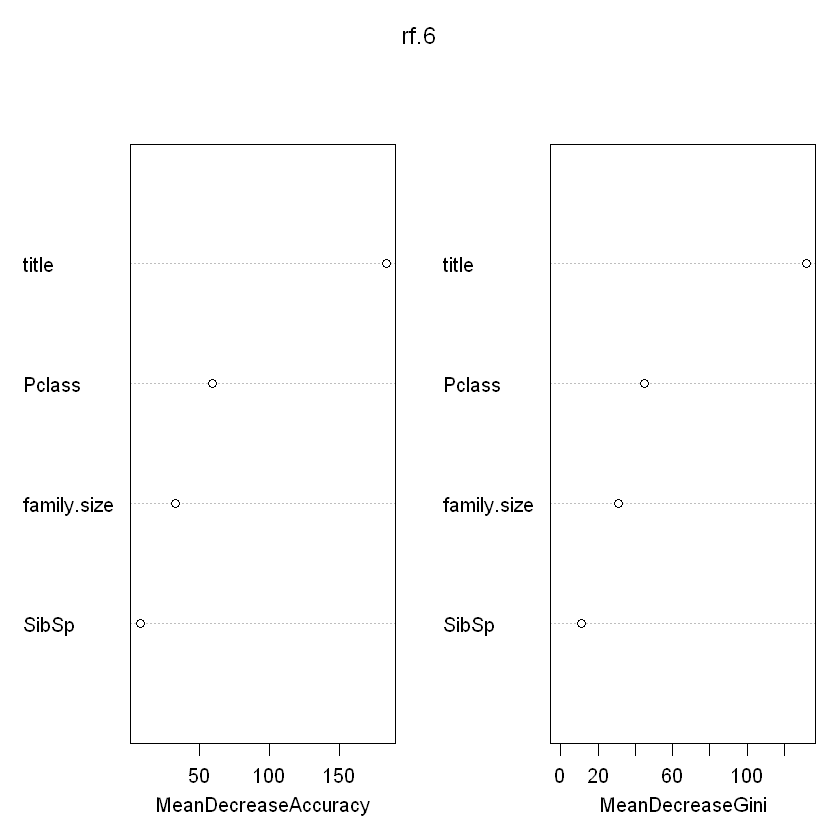

In [80]:
# Train a Random Forest using pclass, title, sibsp, & family.size
rf.train.6 <- data.combined[1:891, c("Pclass", "title", "SibSp", "family.size")]

set.seed(1234)
rf.6 <- randomForest(x = rf.train.6, y = rf.label, importance = TRUE, ntree = 1000)
rf.6
varImpPlot(rf.6)






Call:
 randomForest(x = rf.train.7, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 19.19%
Confusion matrix:
    0   1 class.error
0 489  60   0.1092896
1 111 231   0.3245614

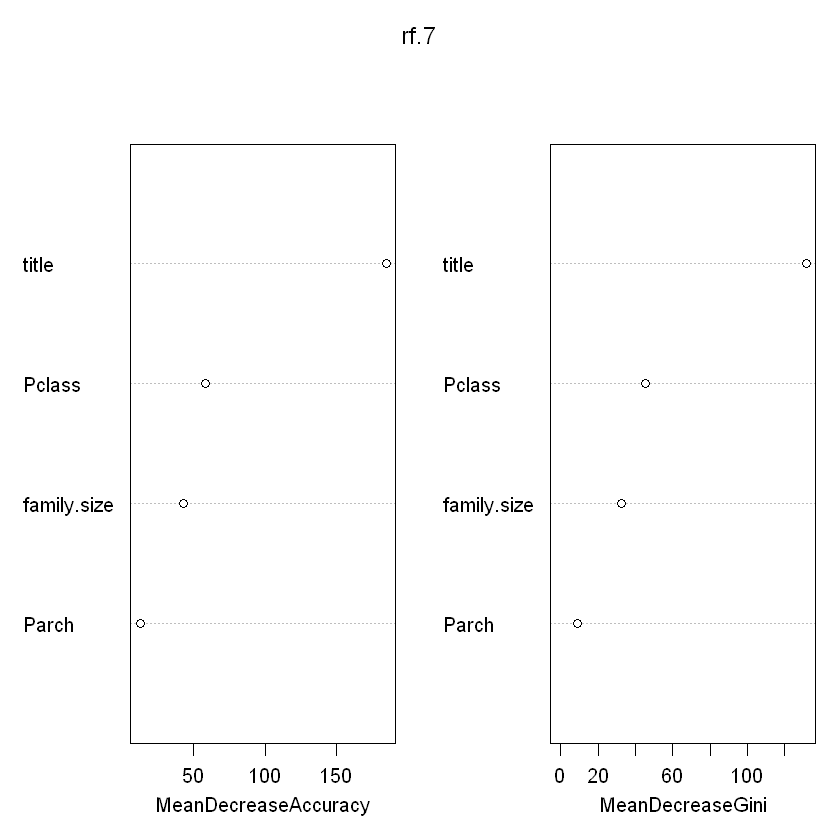

In [81]:
# Train a Random Forest using pclass, title, parch, & family.size
rf.train.7 <- data.combined[1:891, c("Pclass", "title", "Parch", "family.size")]

set.seed(1234)
rf.7 <- randomForest(x = rf.train.7, y = rf.label, importance = TRUE, ntree = 1000)
rf.7
varImpPlot(rf.7)

In [82]:
# Subset our test records and features
test.submit.df <- data.combined[892:1309, c("Pclass", "title", "family.size")]

In [83]:
# Make predictions
rf.5.preds <- predict(rf.5, test.submit.df)
table(rf.5.preds)

rf.5.preds
  0   1 
258 160 

In [84]:
# Write out a CSV file for submission to Kaggle
submit.df <- data.frame(PassengerId = rep(892:1309), Survived = rf.5.preds)

In [85]:
write.csv(submit.df, file = "RF_SUB_20160215_1.csv", row.names = FALSE)